The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize's Kaggle source

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [2]:
%pip install pandas numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
# Load the dataset
df = pd.read_csv("/Users/annguyen/Desktop/Python/Nobel Prize Project/nobel.csv")
print(df.head(10))

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   
5  1901     Physics                 The Nobel Prize in Physics 1901   
6  1902   Chemistry               The Nobel Prize in Chemistry 1902   
7  1902  Literature              The Nobel Prize in Literature 1902   
8  1902    Medicine  The Nobel Prize in Physiology or Medicine 1902   
9  1902       Peace                      The Nobel Peace Prize 1902   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...    

In [4]:
# Most common value in a column
top_gender = df['sex'].value_counts().index[0]
top_country = df['birth_country'].value_counts().index[0]
print("\n The gender with the most Nobel prizes is : ",top_gender)
print("\n The most common brith country of Nobel prizes is : ",top_country)


 The gender with the most Nobel prizes is :  Male

 The most common brith country of Nobel prizes is :  United States of America


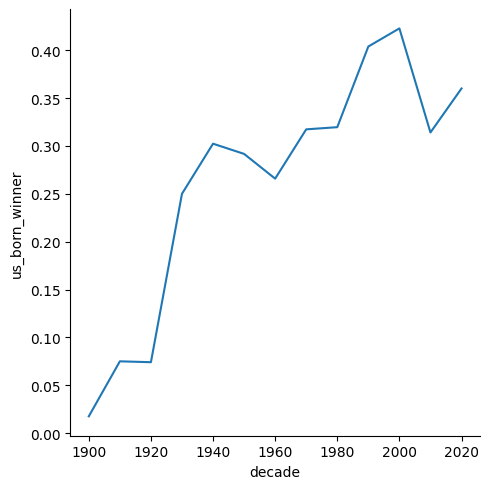

In [5]:
# Identify the decade with the highest ratio of US-born winners

df['us_born_winner'] = df['birth_country'] == 'United States of America'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
ratio = df.groupby("decade",as_index=False)["us_born_winner"].mean()
max_decade_usa = ratio[ratio['us_born_winner'] == ratio['us_born_winner'].max()]['decade'].values[0]
ax = sns.relplot(x='decade',y='us_born_winner',data=ratio,kind='line')


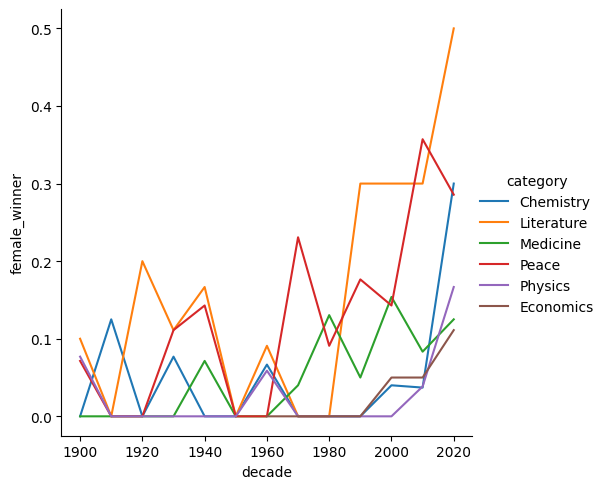

In [6]:
# Find the decade and category with the highest proportion of female laureates
df['female_winner'] = df['sex'] == 'Female'
new_ratio = df.groupby(["decade","category"],as_index=False)['female_winner'].mean()
max_female_decade_category = new_ratio[new_ratio['female_winner'] == new_ratio['female_winner'].max()][['decade','category']]

# Create a dictionary with the decade and category pair 
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Create a relational line plot
ax1 = sns.relplot(x='decade',y='female_winner',data=new_ratio,kind='line',hue='category')

In [7]:
# Find the first woman to win a Nobel prize
new_df = df[df['female_winner']]
min_row = new_df[new_df['year'] == new_df["year"].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman win Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# Which individuals or organizations received >= 2 prizes
count = df['full_name'].value_counts()
repeat = count[count >= 2].index
repeat_list = list(repeat)
print("\n The repeat winners are : ",repeat_list)


 The first woman win Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The repeat winners are :  ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
